# Solving ODEs

_Rev04 280819 DAL, Physics SFU_

_Rev01 July19 NLH, Physics SFU_

[Needs intro]

In [ ]:
# For scientific computing
import numpy as np
import scipy as sp

# Import the integrate module to get access to the ODE solvers
import scipy.integrate

# For plotting
import matplotlib.pyplot as plt

There are two interfaces for solving ODEs in SciPy: `odeint` and `solve_ivp`. The latter is the more recent implementation, but most tutorials still use `odeint`. This tutorial will focus on `solve_ivp`. 

ODEs in SciPy are solved by defining the equations as a function and passing that function to `solve_ivp` along with the range over which to integrate and the initial conditions. Please see the scipy documentation for details of how to use `solve_ivp`.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

This demo demonstrates how to use `solve_ivp` through a series of examples.

### Example 1: First-order ODE

Solve the following initial-value problem (IVP)

$$\frac{dy}{dx} - \frac{2}{y} + 3\sin(x)=0$$

over the range from $x=0$ to $x=5$ with $y(0) = 0.5$.

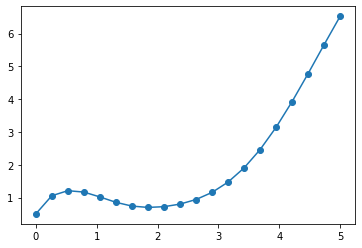

In [ ]:
def dy_dx(x, y):
    return 2/y - 3*np.sin(x)

# define an array of points over which the result should be evaluated
xs = np.linspace(0, 5, 20)

# The ivp solver requires the following inputs: the ODE function, the range over which the equations  
# should be integrated, the initial conditions defined with keyword y0=[], and an array of points where
# the function should be evaluated defined with keyword t_eval=.

# The results are then available in the array res.y[0].

res = sp.integrate.solve_ivp(dy_dx, [0, 5], y0=[0.5], t_eval=xs)
plt.plot(xs, res.y[0], 'o-')
plt.show()

### Example 2: Second-order ODE

In order to solve a second-order ODE, you must first rewrite it as two first-order ODEs. For example, if your IVP is 

$$y'' - y' - \sin(y) - \cos(x) = 0$$

with $y(0)=1$ and $y'(0)=-0.1$.

Rewrite this as two first-order ODEs by defining $v_2 = y'$ and $v_1=y$. The resulting equations are: 

$$v_2' = v_2 + \sin(v_1) + \cos(x)$$
$$v_1' = v_2$$

with $v_1(0)=1$ and $v_2(0)=-0.1$.

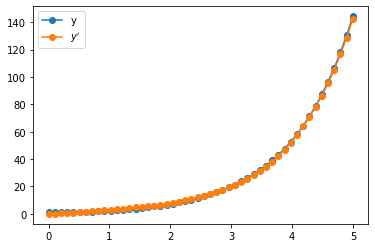

In [ ]:
# v[0] is going to be y
# v[1] is going to be y'
def dv_dx(x, v):
    v1 = v[0]
    v2 = v[1]
    return (v2,v2 + np.sin(v1) + np.cos(x))

# define an array of points over which the result should be evaluated
xs = np.linspace(0, 5, 50)

# Note that there are now two initial conditions for v1 and v2, defined as y0=[1, -1] 
# The output array contains results for v1 and v2
res = sp.integrate.solve_ivp(func, [0, 5], y0=[1, -0.1], t_eval=xs)
plt.plot(xs, res.y[0],'o-')
plt.plot(xs, res.y[1],'o-')
plt.legend(['y','$y\'$'])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4939151a-2261-4374-8b6d-a725368f8dc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>